<a href="https://colab.research.google.com/github/jatinsharma16/Capstone-Project-Classification/blob/main/cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name - Cardiovascular Risk Prediction**

Project type: Classification

Contribution: Individual

#**PROJECT SUMMARY**

#**GITHUB LINK**

Github link: https://github.com/jatinsharma16/Capstone-Project-Classification

#**PROBLEM STATEMENT**

<h2> Problem overview

The cardiovascular risk prediction is really important for any patient who might get affected due to this problem, therefore it becomes a major concern to detect the risk before hand so as to provide suitable treatment to the patient and prevent any major problem.

The data is from an ongoing study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides with the patients' information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

To prevent the patient from any major problem, it becomes the priority to detect any problem and to tackle the same before it is too late to take any action which in turn helps the doctors or the hospitals to reduce the mortality rate and provide a better treatment to the patient. This helps hospitals to build a good relation with the patients and many lives are also saved. 

Making better relations with the patients result in better patient-doctor interactions which helps the hospital to grow as more consistent patients are there and helps the business achieve new heights making their patients a family.



#**PROJECT STARTS HERE**

### Knowing the data

In [2]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# mounting the drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
# Defining the path of the csv file and reading the content of the file
path = "/content/drive/MyDrive/Almabetter/Modules/Machine_Learning/Classification_Capstone_project/data_cardiovascular_risk.csv"
df = pd.read_csv(path)

In [5]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


The above data shows that our dataset has 3390 records.

In [7]:
df.shape

(3390, 17)

Basically, the dataset contains 3390 records of different patients and the number of columns present in the dataset are 17.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [9]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
df.describe().shape

(8, 15)

Out of 17 columns, the dataset contains 15 columns with numerical data although many of them are categorical variables.

In [11]:
#all the columns present in the dataset
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

<h1> Column Description

- **id**: The id of the patients.
- **age**: The age of the patient.
- **education**: education of the patient.
- **sex**: male or female (M/F).
- **is_smoking**: whether the patient smoke or not (Yes/No).
- **cigsPerDay**: the number of cigarettes that the patient on an average smokes per day.
- **BPMeds**: Whether the patient is taking BP medicines.
- **prevalentStroke**: Whether the patient has any stroke history.
- **prevalentHyp**: Whether the patient has problem of hypertension.
- **diabetes**: Whether the patient has diabetes.
- **totChol**: total cholestrol level of the patient.
- **sysBP**: Systolic blood pressure of the patient.
- **diaBP**: Diastolic blood pressure of the patient.
- **BMI**: Body mass index of the patient.
- **heartRate**: The heart rate of the patient per minute.
- **glucose**: Glucose level of the patient.
- **TenYearCHD**: 10-year risk of coronary heart disease. (Dependent variable)

### Handling Duplicate values

In [12]:
# Checking for duplicates
df[df.duplicated()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


As we can see that there are no duplicates present in the dataset, now lets see the null values.

### Handling NULL values

In [13]:
# Checking for null values
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Since there are missing values present, therefore we'll first substitute the missing values with appropriate values and then start the EDA part.

In [14]:
# Handling the missing values present in education column
df['education'].describe()

count    3303.000000
mean        1.970936
std         1.019081
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64

In [15]:
df['education'].unique()

array([ 2.,  4.,  1.,  3., nan])

as we can see that education is not a continuous variable therefore we'll be using Mode to fill the missing values.

In [16]:
df['education'] = df['education'].fillna(df['education'].mode()[0])

In [17]:
# Moving to the next column cigsPerDay
df['cigsPerDay'].describe()

count    3368.000000
mean        9.069477
std        11.879078
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [18]:
df['cigsPerDay'].unique()

array([ 3.,  0., 10., 20., 30., 35., 40., 15.,  9., 60., 17., 25.,  5.,
       43.,  7., 50., 19., 18.,  1., 45.,  2.,  6., nan, 11.,  8.,  4.,
       14., 16., 23., 13., 12., 70., 38.])

Since the cigsPerDay is a numerical continuous column therefore we'll use median to fill the null values.

In [19]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())

In [20]:
# Moving to the third column with missing values that is BPmeds
df['BPMeds'].describe()

count    3346.000000
mean        0.029886
std         0.170299
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64

In [21]:
df['BPMeds'].unique()

array([ 0., nan,  1.])

Since BPMeds is a categorical column therefore we'll use mode to fill the missing values.

In [22]:
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])

In [23]:
# the next column with null values are totChol
df['totChol'].describe()

count    3352.000000
mean      237.074284
std        45.247430
min       107.000000
25%       206.000000
50%       234.000000
75%       264.000000
max       696.000000
Name: totChol, dtype: float64

In [24]:
df['totChol'].unique()

array([221., 212., 250., 233., 241., 272., 238., 295., 220., 326.,  nan,
       210., 213., 227., 188., 240., 257., 267., 232., 199., 175., 164.,
       226., 248., 245., 279., 273., 252., 198., 266., 216., 237., 193.,
       293., 180., 206., 215., 208., 262., 270., 292., 346., 202., 340.,
       334., 351., 235., 243., 196., 275., 186., 190., 268., 234., 264.,
       156., 260., 225., 183., 246., 174., 288., 254., 150., 211., 161.,
       274., 214., 195., 165., 302., 265., 251., 205., 209., 258., 222.,
       247., 189., 173., 281., 382., 181., 200., 244., 218., 261., 229.,
       291., 312., 170., 176., 290., 204., 239., 162., 314., 194., 271.,
       313., 305., 285., 169., 224., 201., 185., 307., 179., 280., 219.,
       391., 300., 253., 345., 278., 282., 255., 191., 439., 327., 287.,
       236., 332., 207., 230., 155., 335., 325., 223., 231., 197., 184.,
       310., 157., 228., 166., 303., 320., 163., 259., 178., 137., 217.,
       342., 328., 168., 167., 299., 304., 152., 28

Since the totChol is a continuous variable therefore using median to fill the missing values.

In [25]:
df['totChol'] = df['totChol'].fillna(df['totChol'].median())

In [26]:
# The next column is the BMI
df['BMI'].describe()

count    3376.000000
mean       25.794964
std         4.115449
min        15.960000
25%        23.020000
50%        25.380000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

In [27]:
df['BMI'].unique()

array([  nan, 29.77, 20.35, ..., 29.19, 19.71, 31.09])

Here we can see that BMI is also a continuous variable therefore we'll use median to fill the null values.

In [28]:
df['BMI'] = df['BMI'].fillna(df['BMI'].median())

In [29]:
# the second last column with null values is the heartrate
df['heartRate'].describe()

count    3389.000000
mean       75.977279
std        11.971868
min        45.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

In [30]:
df['heartRate'].unique()

array([ 90.,  72.,  88.,  68.,  70.,  85.,  75.,  60.,  86.,  80.,  74.,
       100.,  89.,  92.,  82.,  87.,  58.,  79.,  78.,  76.,  69.,  59.,
        67.,  50.,  73.,  66.,  65.,  62., 110.,  83.,  64.,  63.,  96.,
        55.,  77., 112.,  84.,  95.,  61., 120.,  93.,  94., 104.,  52.,
        56.,  98., 106.,  48.,  54.,  81., 115., 103.,  71., 107.,  57.,
       143.,  91.,  45., 102., 108.,  53.,  47.,  nan, 125., 105., 122.,
        51., 140.,  97.])

Since it is a continuous variable therefore using median to fill the missing values.

In [31]:
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

In [32]:
# the last column which holds some missing values is glucose
df['glucose'].describe()

count    3086.000000
mean       82.086520
std        24.244753
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [33]:
df['glucose'].unique()

array([ 80.,  75.,  94.,  77.,  65.,  79.,  63.,  nan,  87.,  67.,  85.,
       132.,  76., 100.,  70.,  60.,  73.,  81.,  68.,  66.,  78.,  96.,
        72.,  61.,  69., 103.,  92., 105.,  93.,  89.,  64.,  83., 170.,
        57.,  58.,  86.,  99., 107.,  55.,  90., 177.,  71., 118.,  59.,
        74.,  84.,  82.,  95., 120., 173.,  91., 102., 163.,  88.,  62.,
       205.,  97., 115.,  98., 268., 104., 137., 106., 348., 110., 122.,
       108., 255., 140., 124., 244., 294., 112., 113., 254., 116.,  52.,
        50., 114., 127.,  56., 135.,  45., 206.,  53., 101., 117., 126.,
       131., 394., 123., 270., 320., 129., 142.,  54., 235.,  40., 150.,
       136., 191.,  44., 119., 109., 121.,  43., 256., 145.,  47., 297.,
       166., 172.,  48., 111., 215., 216., 368., 155., 148., 147., 223.,
       225., 332., 210., 186., 386., 248., 193., 125., 167., 183., 260.,
       274.])

Glucose is also a continuous varible therefore we'll be using median to fill the null values.

In [34]:
df['glucose'] = df['glucose'].fillna(df['glucose'].median())

In [35]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

So, now we have done the data cleaning part and now the dataset do not have any duplicate values or any null values therefore now we can move to the next step that is the Exploratory Data Analysis part.

## Exploratory Data Analysis

### boxplots

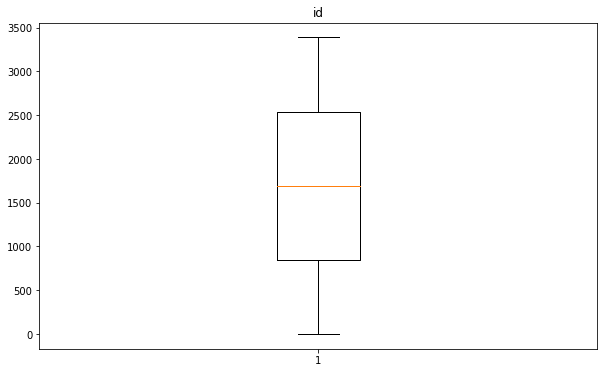

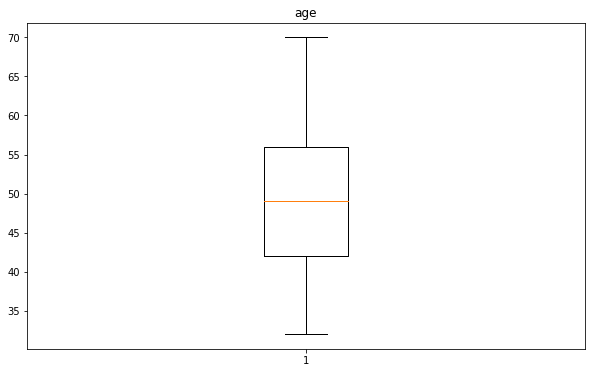

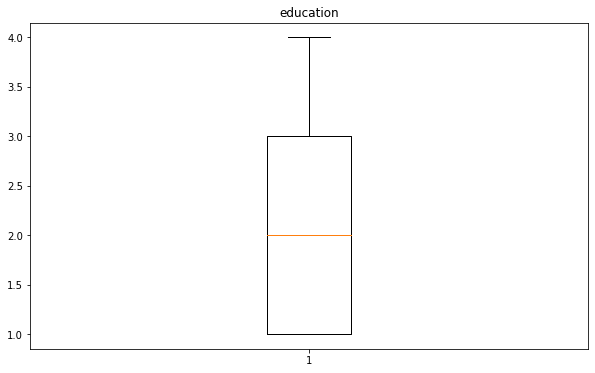

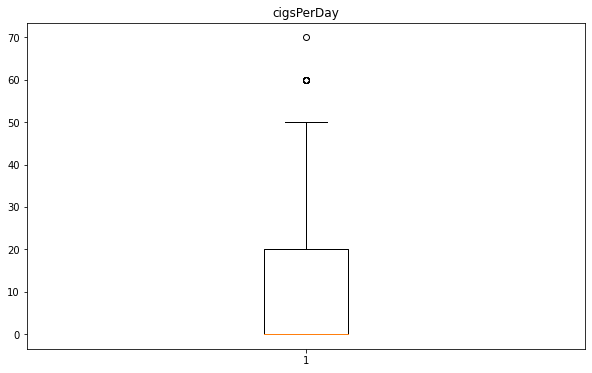

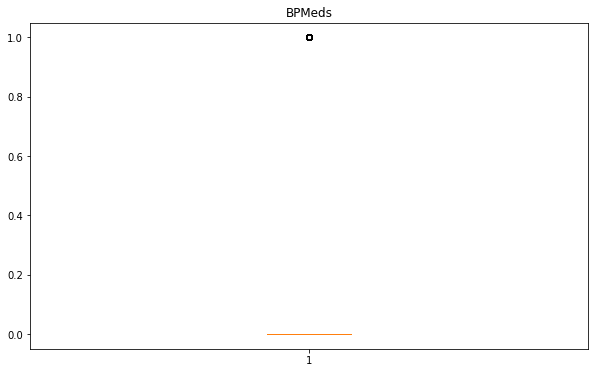

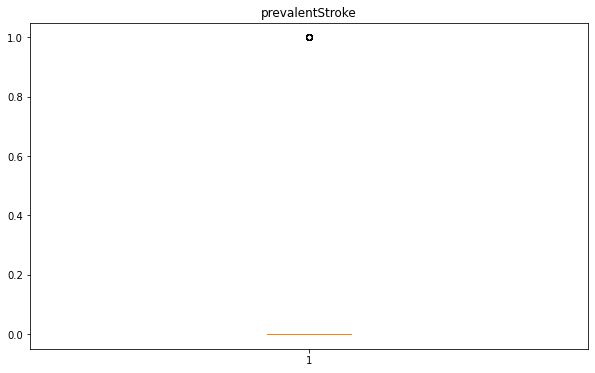

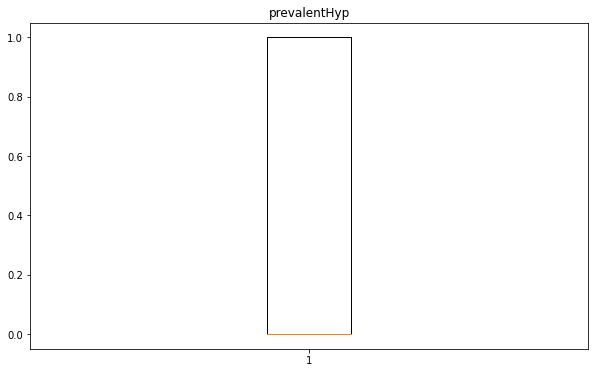

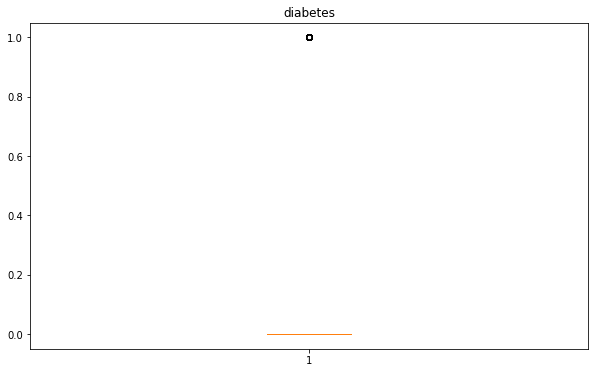

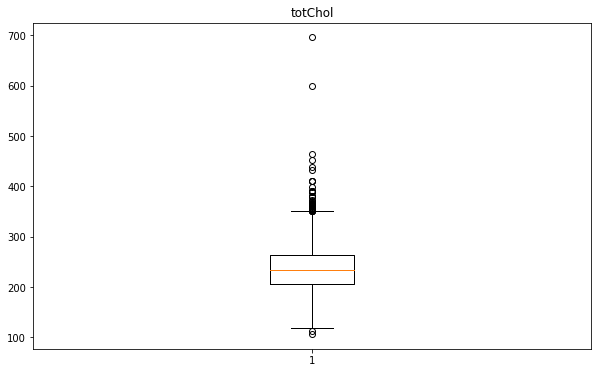

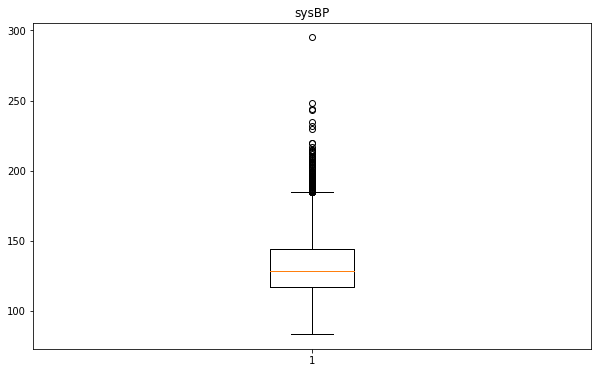

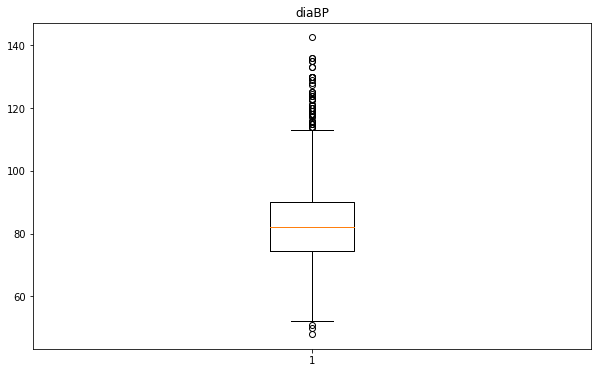

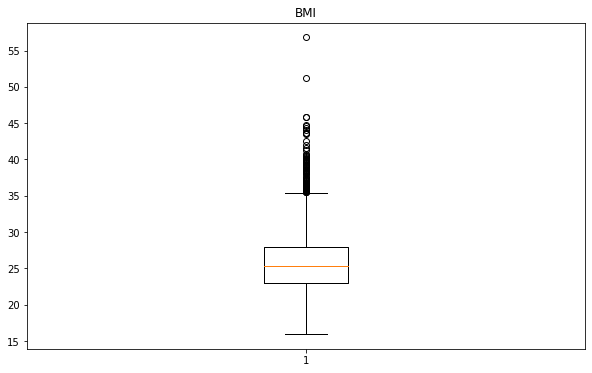

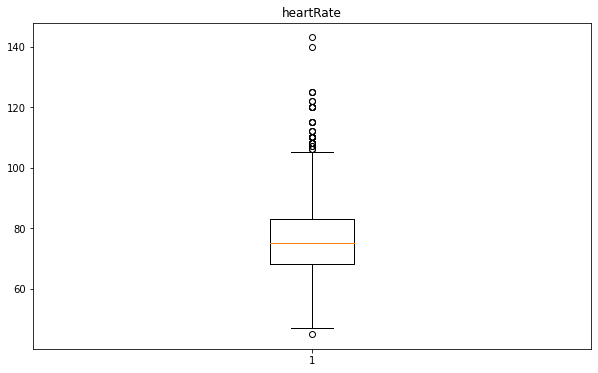

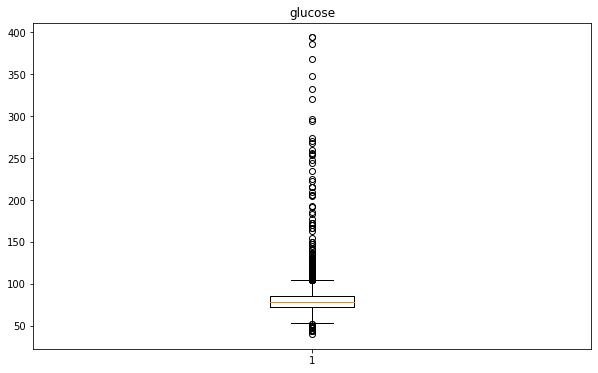

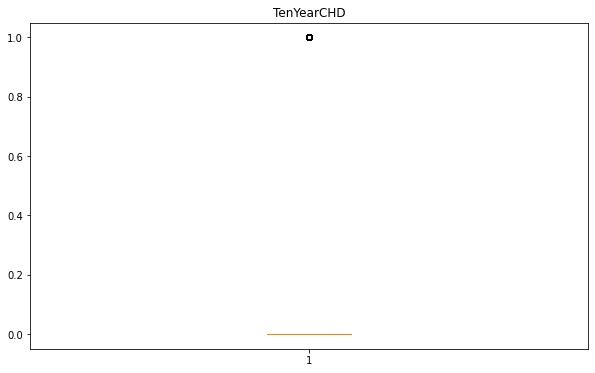

In [36]:
numeric_col = df.describe().columns

for col in numeric_col:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.gca()
    feature = df[col]
    plt.boxplot(df[col])
    ax.set_title(col)

plt.show()

- Used the box plots to see whether any outliers are present in the data or not.
- No big outlier is present in the values.

### Risk ratio

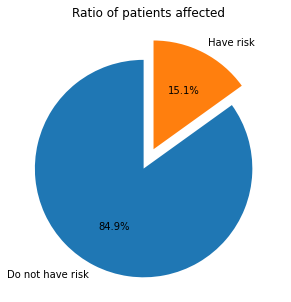

In [148]:
plt.rcParams['figure.figsize'] = (8,5)
plt.pie(df.groupby('TenYearCHD')['id'].count(),
        labels=['Do not have risk', 'Have risk'],
        explode = [0.1,0.1],
        startangle = 90,
        autopct = '%1.1f%%')
plt.title('Ratio of patients affected')
plt.show()

- Used pie chart to see the ratio of patients that are affedted by the CHD risk out of all the patients.
- The chart shows that only 15% patients are affected by the CHD risk.

### age analysis

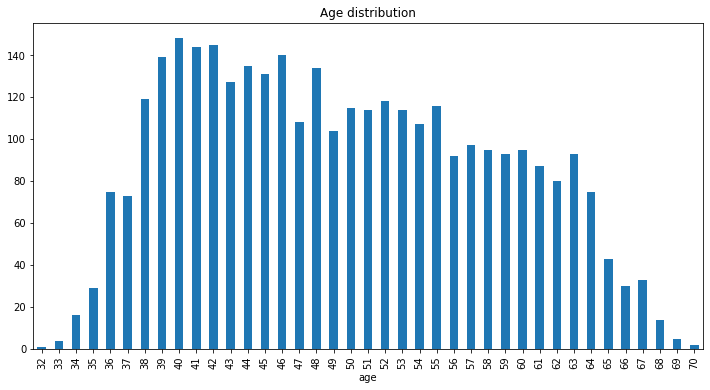

In [37]:
plt.rcParams['figure.figsize'] = (12,6)
df.groupby('age')['id'].count().plot(kind = 'bar')
plt.title('Age distribution')
plt.show()

- Using bar plot to see what is the amount of patients present in the dataset and their age groups.
- the graph shows that we have records of people aging from 32 to 70.

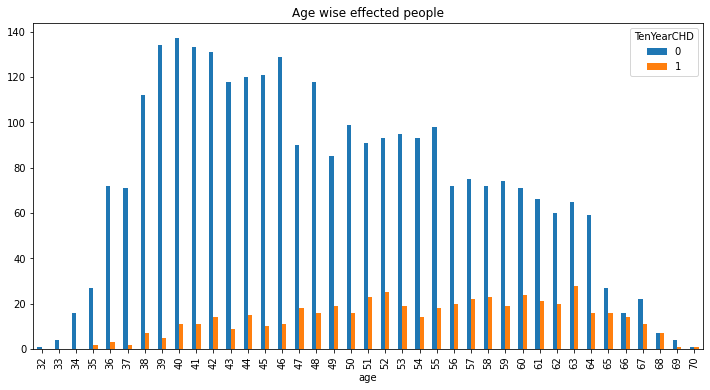

In [38]:
plt.rcParams['figure.figsize'] = (12,6)
df.groupby(['age', 'TenYearCHD'])['id'].count().unstack().plot(kind = 'bar')
plt.title('Age wise effected people')
plt.show()

- We used this chart to see how many people are there in each age group and what is the ratio of the people that are affected by the CHD.
- The graph shows that people from 35 age are vulnerable to CHD.

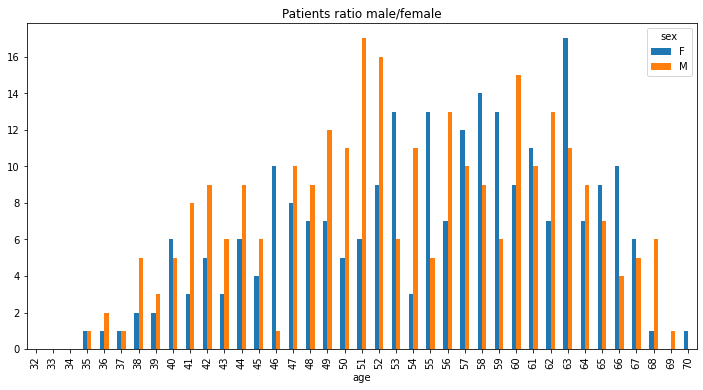

In [39]:
plt.rcParams['figure.figsize'] = (12,6)
df.groupby(['age', 'sex'])['TenYearCHD'].sum().unstack().plot(kind = 'bar')
plt.title('Patients ratio male/female')
plt.show()

- Used this graph to see the ratio between the male and female that are affected by the CHD.
- We can observe that more number of males are affected by the CHD at most ages.

### sex analysis

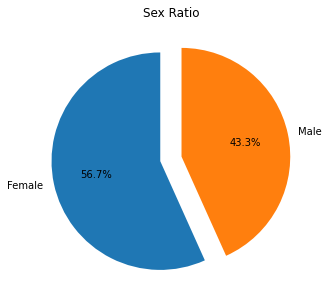

In [40]:
plt.rcParams['figure.figsize'] = (8,5)
plt.pie(df.groupby('sex')['id'].count(),
        labels=['Female', 'Male'],
        explode = [0.1,0.1],
        startangle = 90,
        autopct = '%1.1f%%')
plt.title('Sex Ratio')
plt.show()

- Used this graph to see the ratio of records present in the dataset w.r.t. the sex of the patient.
- We have 56.7% female patients where as 43.3% patients are male.

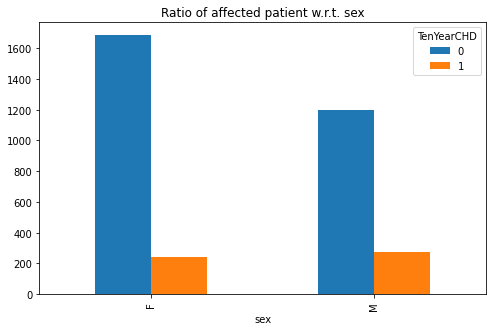

In [41]:
plt.rcParams['figure.figsize'] = (8,5)
df.groupby(['sex', 'TenYearCHD'])['id'].count().unstack().plot(kind = 'bar')
plt.title('Ratio of affected patient w.r.t. sex')
plt.show()

In [42]:
df.groupby(['sex','TenYearCHD'])['id'].sum()

sex  TenYearCHD
F    0             2849813
     1              407060
M    0             2016942
     1              470540
Name: id, dtype: int64

- Used the graph to see the ratio of total patients and the patients which are affected by the CHD.
- The above graph along with the data shows that although more female patients are there yet more number of male patients have the problem of CHD.

### Education analysis

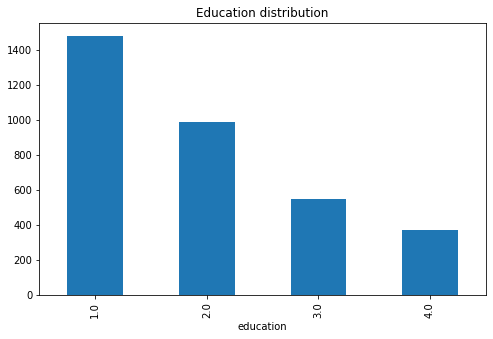

In [43]:
plt.rcParams['figure.figsize'] = (8,5)
df.groupby('education')['id'].count().plot(kind = 'bar')
plt.title('Education distribution')
plt.show()

- Used the bar graph to see the distribution of education among the patients.
- The bar graph shows that the level of education shows a decline from 1 to 4.

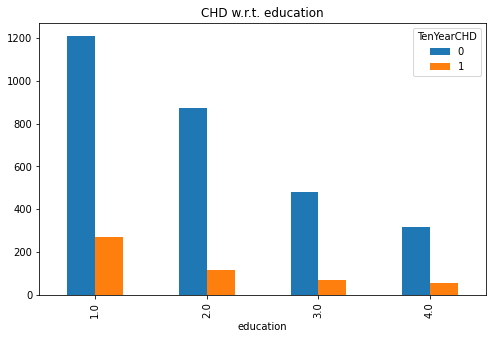

In [44]:
plt.rcParams['figure.figsize'] = (8,5)
df.groupby(['education','TenYearCHD'])['id'].count().unstack().plot(kind = 'bar')
plt.title('CHD w.r.t. education')
plt.show()

- Used paired bar chart to see the ratio of all patients and patients affected with CHD w.r.t. education.
- The graph shows that there is no significant data to show that patient with higher education are less affected by the CHD.

### is_smoking analysis

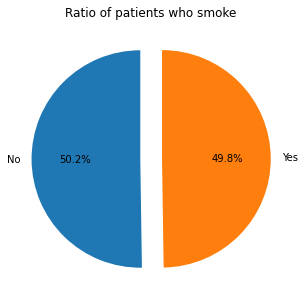

In [45]:
plt.rcParams['figure.figsize'] = (8,5)
plt.pie(df.groupby('is_smoking')['id'].count(),
        labels=['No','Yes'],
        explode = [0.1,0.1],
        startangle = 90,
        autopct = '%1.1f%%')
plt.title('Ratio of patients who smoke')
plt.show()

In [46]:
df.groupby('is_smoking')['id'].count()

is_smoking
NO     1703
YES    1687
Name: id, dtype: int64

- We used pie chart to see the ratio of the patients who smoke to the patients who don't smoke.
- the graph and the data shows that the ratio is almost 50%.

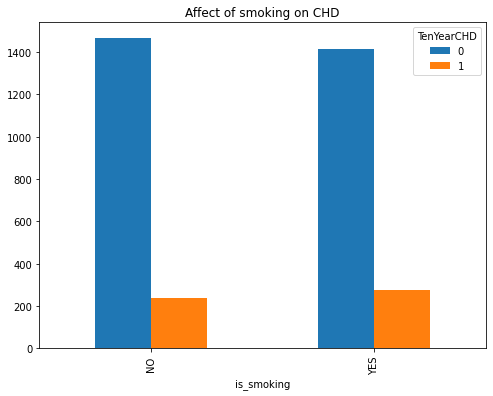

In [47]:
plt.rcParams['figure.figsize'] = (8,6)
df.groupby(['is_smoking','TenYearCHD'])['id'].count().unstack().plot(kind = 'bar')
plt.title('Affect of smoking on CHD')
plt.show()

- Used this graph to see the out of total persons who smoke and who do not smoke, how many are affected by CHD.
- The graph shows that smoking do not have any significant effect on the risk of CHD. 

### cigsPerDay analysis

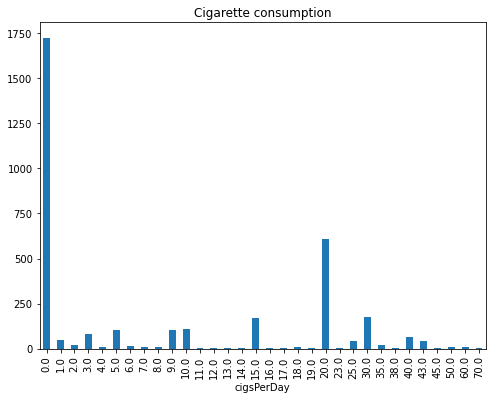

In [48]:
plt.rcParams['figure.figsize'] = (8,6)
df.groupby('cigsPerDay')['id'].count().plot(kind='bar')
plt.title('Cigarette consumption')
plt.show()

- Used bar graph to see what is the division of patients who are smoking on the basis of cigarettes per day.
- The graph shows that out of those who take cigarettes, the max quantity of cigarettes consumed per day is 20.

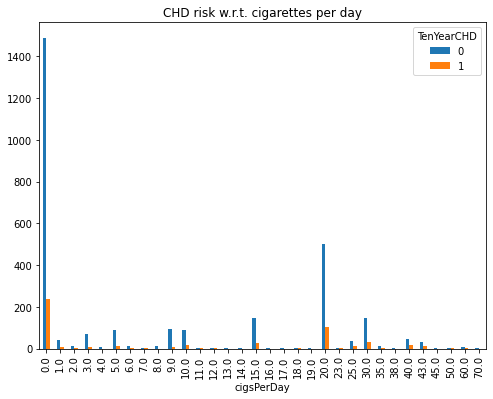

In [49]:
plt.rcParams['figure.figsize'] = (8,6)
df.groupby(['cigsPerDay','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('CHD risk w.r.t. cigarettes per day')
plt.show()

- Used a paired bar plot to see the ratio of people taking cigarettes to those that are affected by the CHD risk.
- the graph shows that the number of cigarettes and its affect do not have any linear trend.

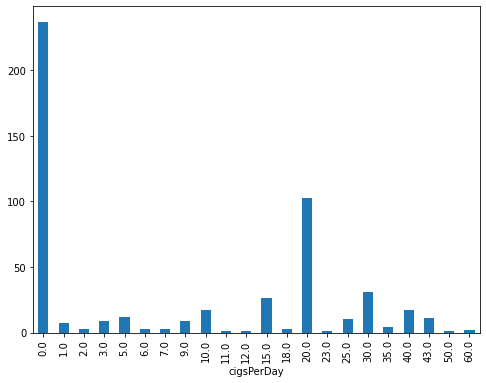

In [50]:
df[df['TenYearCHD'] == 1].groupby('cigsPerDay')['id'].count().plot(kind = 'bar')
plt.show()

- Used a bar plot to see what is the number of patients affected by the CHD risk and what is the count of daily cigarettes for them.
- The number of daily cigarettes do not have any direct impact on the CHD risk.

### BPMeds analysis

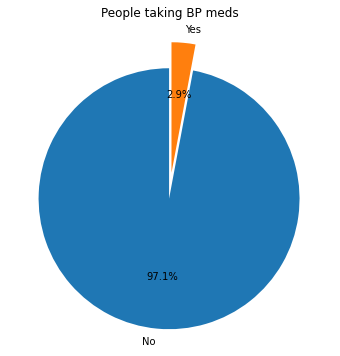

In [51]:
plt.rcParams['figure.figsize'] = (8,6)
plt.pie(df.groupby('BPMeds')['id'].count(),
        labels=['No','Yes'],
        explode = [0.1,0.1],
        startangle = 90,
        autopct = '%1.1f%%')
plt.title('People taking BP meds')
plt.show()

- Used pie chart to see the ratio of people taking the BP meds out of all the people.
- The graph shows that 97.1% patients do not take any medication.

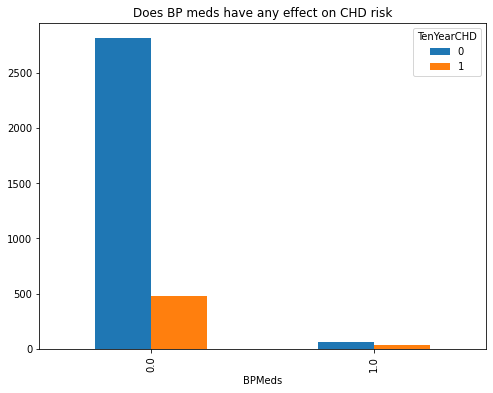

In [52]:
plt.rcParams['figure.figsize'] = (8,6)
df.groupby(['BPMeds','TenYearCHD'])['id'].count().unstack().plot(kind = 'bar')
plt.title('Does BP meds have any effect on CHD risk')
plt.show()

- Used paired bar plot to see what effect does taking BP medicines have on the CHD risk.
- The graph shows that taking the medicines do not prevent the risk of CHD completely.

### prevalentStroke analysis

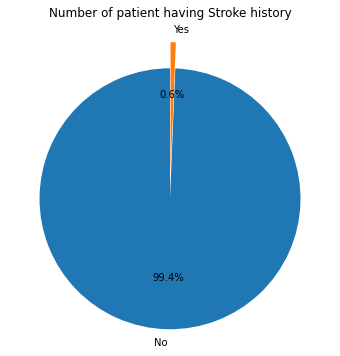

In [53]:
plt.rcParams['figure.figsize'] = (8,6)
plt.pie(df.groupby('prevalentStroke')['id'].count(),
        labels=['No','Yes'],
        explode = [0.1,0.1],
        startangle = 90,
        autopct = '%1.1f%%')
plt.title('Number of patient having Stroke history')
plt.show()

- Used pie chart to see the percentage of people having a stroke history.
- The graph shows that only 0.6% people have a history of stroke

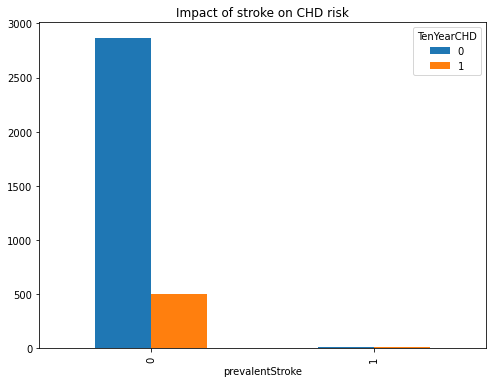

In [54]:
plt.rcParams['figure.figsize'] = (8,6)
df.groupby(['prevalentStroke','TenYearCHD'])['id'].count().unstack().plot(kind = 'bar')
plt.title('Impact of stroke on CHD risk')
plt.show()

In [55]:
df.groupby(['prevalentStroke','TenYearCHD'])['id'].count()

prevalentStroke  TenYearCHD
0                0             2867
                 1              501
1                0               12
                 1               10
Name: id, dtype: int64

- Used paired bar graph and table to see what effect does stroke have on CHD risk.
- Although there are only 22 records with stroke but out of those 22, 10 people have CHD risk.

### prevalentHypertension analysis

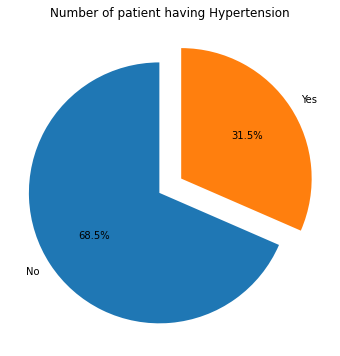

In [56]:
plt.rcParams['figure.figsize'] = (8,6)
plt.pie(df.groupby('prevalentHyp')['id'].count(),
        labels=['No','Yes'],
        explode = [0.1,0.1],
        startangle = 90,
        autopct = '%1.1f%%')
plt.title('Number of patient having Hypertension')
plt.show()

- Used pie chart to see the ratio of patient having hypertension to the patient who don't have hypertension.
- The graph shows that 31.5% of the total patients have the problem of hypertension.

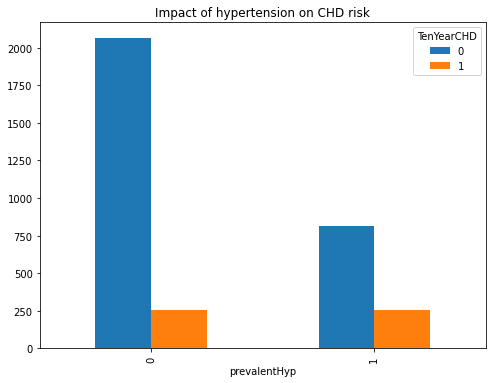

In [57]:
plt.rcParams['figure.figsize'] = (8,6)
df.groupby(['prevalentHyp','TenYearCHD'])['id'].count().unstack().plot(kind = 'bar')
plt.title('Impact of hypertension on CHD risk')
plt.show()

- Used the paired bar graph because we wanted to see the effect of hypertension on CHD risk.
- The graph seems to show that Hypertension have a little impact on the CHD risk as the ratio of people having hypertension and CHD risk is more than that of people not having hypertension and CHD risk.

### Dibetes analysis

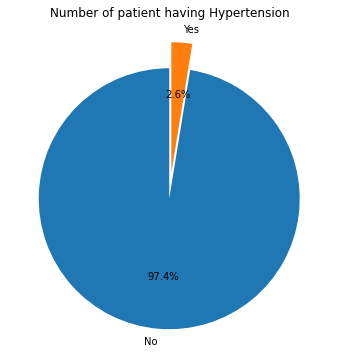

In [58]:
plt.rcParams['figure.figsize'] = (8,6)
plt.pie(df.groupby('diabetes')['id'].count(),
        labels=['No','Yes'],
        explode = [0.1,0.1],
        startangle = 90,
        autopct = '%1.1f%%')
plt.title('Number of patient having Hypertension')
plt.show()

- Used pie chart to see the ratio of people having diabetes.
- Only 2.6% of people have a record of diabetes.

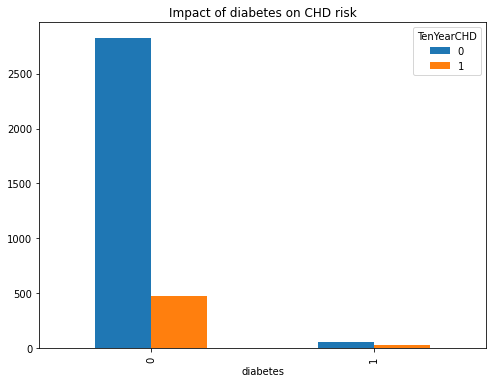

In [59]:
plt.rcParams['figure.figsize'] = (8,6)
df.groupby(['diabetes','TenYearCHD'])['id'].count().unstack().plot(kind = 'bar')
plt.title('Impact of diabetes on CHD risk')
plt.show()

- Used paired bar graph to see the ratio of people which do not have diabetes but have CHD risk to the people having both.
- The graph shows that diabetes has a very small contribution in the CHD risk.

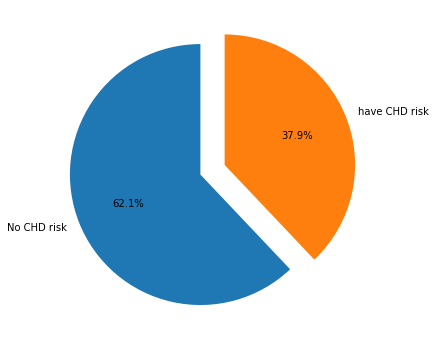

In [60]:
plt.pie(df[df['diabetes'] == 1].groupby('TenYearCHD')['id'].count(),
         labels=['No CHD risk','have CHD risk'],
        explode = [0.1,0.1],
        startangle = 90,
        autopct = '%1.1f%%')
plt.show()

- Used pie chart to see the ratio of people having diabetes and CHD risk to the people having diabetes and not having CHD risk, which wasn't clearly visible in the last graph.
- Almost 38% people having diabetes have a risk of CHD.

### Total Cholestrol analysis

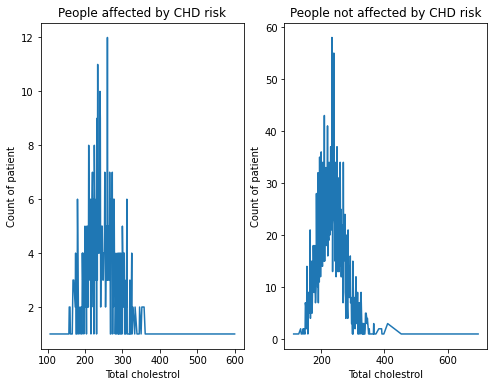

In [61]:
fig, ax = plt.subplots(1,2,figsize=(8,6))
ax1 = plt.subplot(1,2,1)
plt.plot(df[df['TenYearCHD'] == 1].groupby('totChol')['id'].count())
plt.title('People affected by CHD risk')
plt.xlabel('Total cholestrol')
plt.ylabel('Count of patient')

ax2 = plt.subplot(1,2,2)
plt.plot(df[df['TenYearCHD'] == 0].groupby('totChol')['id'].count())
plt.title('People not affected by CHD risk')
plt.xlabel('Total cholestrol')
plt.ylabel('Count of patient')
plt.show()

- Used two line graphs to see the trend of values of cholestrol among the people which are affected by CHD risk to the people which are not affected by CHD risk.
- people who are not affected by CHD shows a little lesser values of cholestrol to the one having the CHD risk.

### sysBP analysis

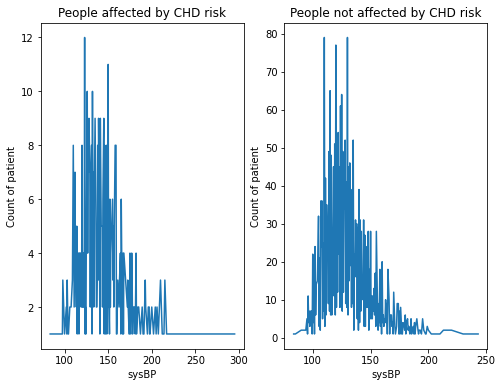

In [62]:
fig, ax = plt.subplots(1,2,figsize=(8,6))
ax1 = plt.subplot(1,2,1)
plt.plot(df[df['TenYearCHD'] == 1].groupby('sysBP')['id'].count())
plt.title('People affected by CHD risk')
plt.xlabel('sysBP')
plt.ylabel('Count of patient')

ax2 = plt.subplot(1,2,2)
plt.plot(df[df['TenYearCHD'] == 0].groupby('sysBP')['id'].count())
plt.title('People not affected by CHD risk')
plt.xlabel('sysBP')
plt.ylabel('Count of patient')
plt.show()

- Used the line graphs to compare the trend of sysBP values of the people having CHD risk to the people who do not have CHD risk.
- The graph shows that people who have CHD risk have a little higher values of sysBP.

### diaBP analysis

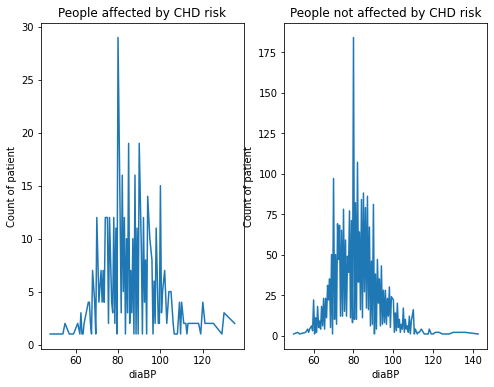

In [63]:
fig, ax = plt.subplots(1,2,figsize=(8,6))
ax1 = plt.subplot(1,2,1)
plt.plot(df[df['TenYearCHD'] == 1].groupby('diaBP')['id'].count())
plt.title('People affected by CHD risk')
plt.xlabel('diaBP')
plt.ylabel('Count of patient')

ax2 = plt.subplot(1,2,2)
plt.plot(df[df['TenYearCHD'] == 0].groupby('diaBP')['id'].count())
plt.title('People not affected by CHD risk')
plt.xlabel('diaBP')
plt.ylabel('Count of patient')
plt.show()

- Used the line graphs to compare the trend of diaBP values of the people having CHD risk to the people who do not have CHD risk.
- The graph shows that people who have CHD risk have a little higher values of diaBP.

### BMI analysis

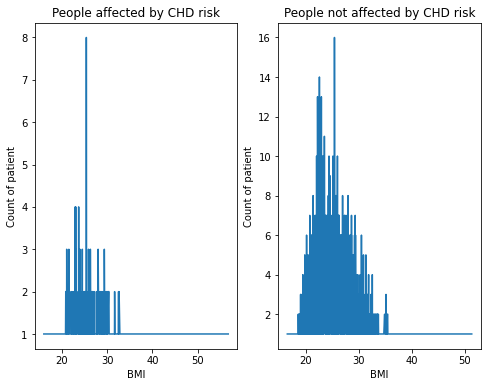

In [64]:
fig, ax = plt.subplots(1,2,figsize=(8,6))
ax1 = plt.subplot(1,2,1)
plt.plot(df[df['TenYearCHD'] == 1].groupby('BMI')['id'].count())
plt.title('People affected by CHD risk')
plt.xlabel('BMI')
plt.ylabel('Count of patient')

ax2 = plt.subplot(1,2,2)
plt.plot(df[df['TenYearCHD'] == 0].groupby('BMI')['id'].count())
plt.title('People not affected by CHD risk')
plt.xlabel('BMI')
plt.ylabel('Count of patient')
plt.show()

- Used the line graphs to compare the trend of BMI values of the people having CHD risk to the people who do not have CHD risk.
- The graph shows that people who have CHD risk have a little higher values of BMI as compared to the people not having CHD risk.

### heartRate analysis

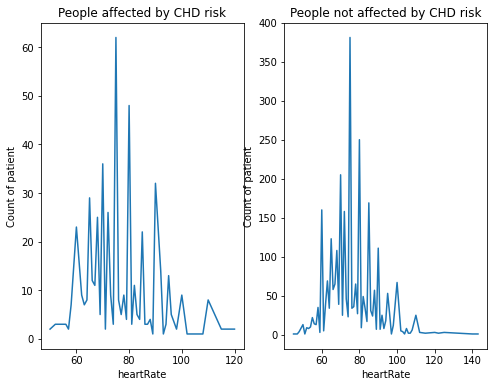

In [65]:
fig, ax = plt.subplots(1,2,figsize=(8,6))
ax1 = plt.subplot(1,2,1)
plt.plot(df[df['TenYearCHD'] == 1].groupby('heartRate')['id'].count())
plt.title('People affected by CHD risk')
plt.xlabel('heartRate')
plt.ylabel('Count of patient')

ax2 = plt.subplot(1,2,2)
plt.plot(df[df['TenYearCHD'] == 0].groupby('heartRate')['id'].count())
plt.title('People not affected by CHD risk')
plt.xlabel('heartRate')
plt.ylabel('Count of patient')
plt.show()

- Used the line graphs to compare the trend of heart rate values of the people having CHD risk to the people who do not have CHD risk.
- The graph does not show any prominent insight through which we can differentiate the two groups.

### glucose analysis

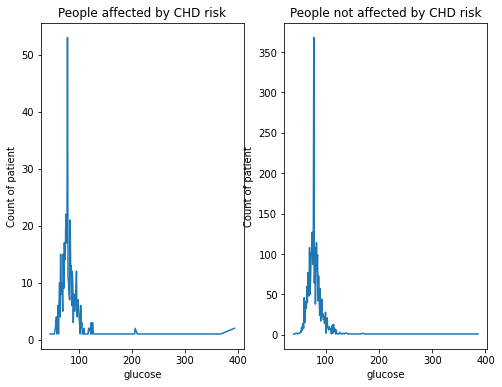

In [66]:
fig, ax = plt.subplots(1,2,figsize=(8,6))
ax1 = plt.subplot(1,2,1)
plt.plot(df[df['TenYearCHD'] == 1].groupby('glucose')['id'].count())
plt.title('People affected by CHD risk')
plt.xlabel('glucose')
plt.ylabel('Count of patient')

ax2 = plt.subplot(1,2,2)
plt.plot(df[df['TenYearCHD'] == 0].groupby('glucose')['id'].count())
plt.title('People not affected by CHD risk')
plt.xlabel('glucose')
plt.ylabel('Count of patient')
plt.show()

- Used the line graphs to compare the trend of glucose values of the people having CHD risk to the people who do not have CHD risk.
- The graph shows that people who have CHD risk have a little higher values of glucose.

### Correlation heatmap

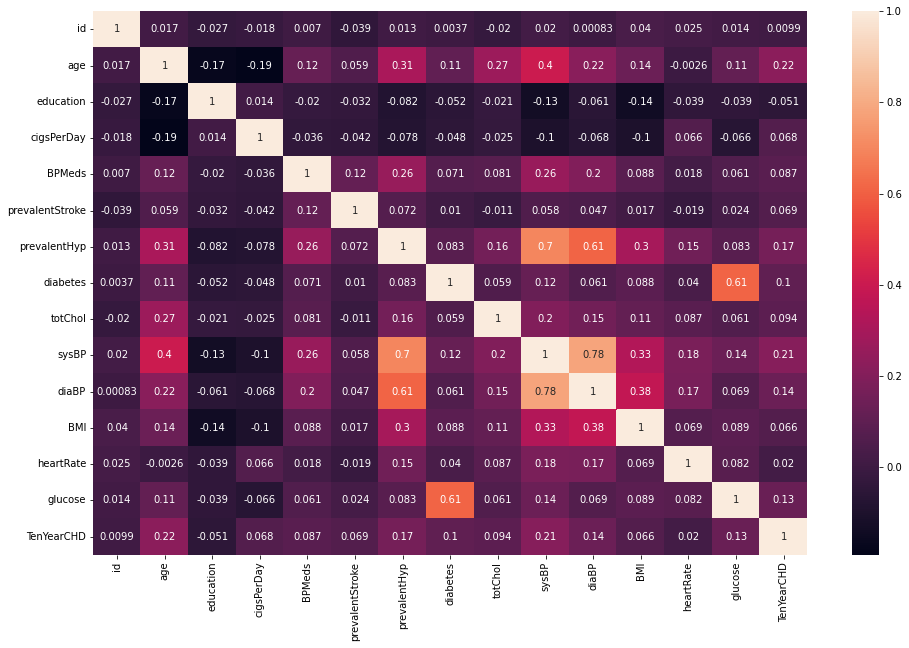

In [70]:
# plotting the pair plot of complete dataset
plt.figure(figsize = (16, 10))
correlation = df.corr()
sns.heatmap(correlation, annot= True)
plt.show()

- Used correlation heat map to see the correlation between the independent and dependent columns.
- The graph shows that 'age' is the column that shows most correlation. Education is the only column that is showing negative correlation with the dependent column.

## Feature Engineering

### Handling Categorical Variables

In [72]:
# We just have two columns that holds textual data, namely sex and is_smoking.
# Therefore mapping these columns to make their values numerical

df['sex'] = df['sex'].map({'M': 1, 'F': 0})
df['is_smoking'] = df['is_smoking'].map({'YES': 1, 'NO': 0})

In [73]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### X-Y split

In [145]:
X = df[['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
        'diaBP', 'BMI', 'heartRate', 'glucose']].copy()
Y = df['TenYearCHD'].copy()

Scalling the data

### Robust Scaler

In [120]:
# Scaling the data
from sklearn import preprocessing

scaler = preprocessing.RobustScaler()
robust_x = scaler.fit_transform(X)
robust_x = pd.DataFrame(robust_x, columns = X.columns)

# Before standardisation, we are using the robust scaler which uses the interquartile technique to remove the outliers.

### Standard Scaler

In [121]:
# Now, standardizing the data

scaler = preprocessing.StandardScaler()
standard_x = scaler.fit_transform(robust_x)
standard_x = pd.DataFrame(standard_x, columns = X.columns)# Now, standardizing the data

scaler = preprocessing.StandardScaler()
standard_x = scaler.fit_transform(robust_x)
standard_x = pd.DataFrame(standard_x, columns = X.columns)

Train test split

In [122]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( standard_x, Y, test_size = 0.3, random_state = 0, stratify = Y)

In [123]:
x_train.shape, x_test.shape

((2373, 15), (1017, 15))

## Logistic Regression 

In [124]:
# Importing the logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(fit_intercept = True, max_iter = 10000)
# Fitting the model over the train data
lr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [125]:
lr.coef_

array([[ 0.5298742 , -0.03517674,  0.19366483,  0.08726132,  0.21257812,
         0.01042617,  0.07587743,  0.13238309,  0.00779328,  0.07719599,
         0.30148608, -0.05365189,  0.02131677, -0.04725102,  0.20024919]])

In [126]:
# Predicting over the train data and the test data
train_preds = lr.predict(x_train)
test_preds = lr.predict(x_test)

In [127]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(f'The accuracy score on train data is {accuracy_score(train_preds, y_train)}')
print(f'The accuracy score on test data is {accuracy_score(test_preds, y_test)}')

The accuracy score on train data is 0.8588284871470713
The accuracy score on test data is 0.8593903638151426


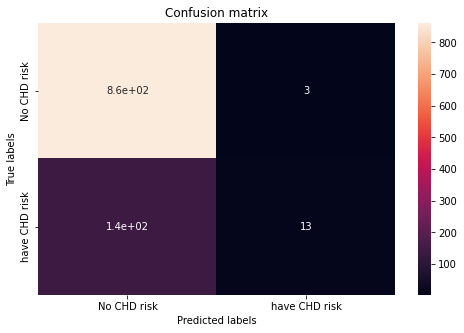

In [128]:
# Making confusion matrix for the test data

plt.figure(figsize = (8, 5))
labels = ['No CHD risk', 'have CHD risk']
cm = confusion_matrix(y_test, test_preds)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [129]:
from sklearn.metrics import classification_report
print(classification_report(train_preds, y_train))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      2336
           1       0.08      0.81      0.15        37

    accuracy                           0.86      2373
   macro avg       0.54      0.84      0.54      2373
weighted avg       0.98      0.86      0.91      2373



In [130]:
print(classification_report(test_preds, y_test))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      1001
           1       0.08      0.81      0.15        16

    accuracy                           0.86      1017
   macro avg       0.54      0.84      0.54      1017
weighted avg       0.98      0.86      0.91      1017



In [131]:
from sklearn.metrics import roc_auc_score

print('roc_auc_score for train data: ', roc_auc_score(y_train, train_preds))
print('roc_auc_score for test data: ', roc_auc_score(y_test, test_preds))

roc_auc_score for train data:  0.5401624686360675
roc_auc_score for test data:  0.5407475490196078


### Using SMOTE

In [132]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(X, Y)

In [133]:
y_sm=pd.DataFrame(y_sm)

In [134]:
x_train, x_test, y_train, y_test = train_test_split( x_sm, y_sm, test_size = 0.3, random_state = 0, stratify = y_sm) 
lr = LogisticRegression(fit_intercept = True, max_iter = 10000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [135]:
train_preds = lr.predict(x_train)
test_preds = lr.predict(x_test)

In [136]:
print(classification_report(train_preds, y_train))
print('roc_auc_score for train data: ', roc_auc_score(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.67      0.68      0.67      2004
           1       0.68      0.67      0.68      2026

    accuracy                           0.67      4030
   macro avg       0.67      0.67      0.67      4030
weighted avg       0.67      0.67      0.67      4030

roc_auc_score for train data:  0.6741935483870968


In [137]:
print(classification_report(test_preds, y_test))
print('roc_auc_score for train data: ', roc_auc_score(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       874
           1       0.66      0.67      0.67       854

    accuracy                           0.67      1728
   macro avg       0.67      0.67      0.67      1728
weighted avg       0.67      0.67      0.67      1728

roc_auc_score for train data:  0.6678240740740742


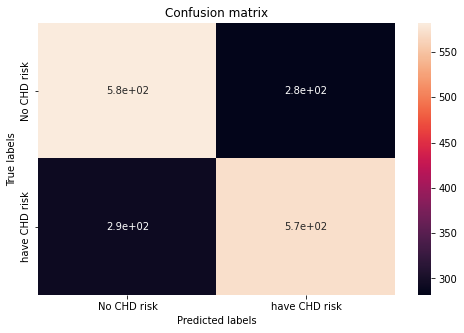

In [138]:
# Making confusion matrix for the test data

plt.figure(figsize = (8, 5))
labels = ['No CHD risk', 'have CHD risk']
cm = confusion_matrix(y_test, test_preds)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

### Cross validation and hyperparameter tuning

In [139]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [140]:
model = LogisticRegression(max_iter=10000)
solvers = ['lbfgs']
penalty = ['10','l2','14','16','20','18']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_result=grid_search.fit(x_train, y_train)


In [141]:
grid_result.best_score_, grid_result.best_params_

(0.6782413780206494, {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'})

In [142]:
train_class_preds = grid_result.predict(x_train)
test_class_preds = grid_result.predict(x_test)

In [143]:
print(classification_report(train_preds, y_train))
print('roc_auc_score for train data: ', roc_auc_score(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.67      0.68      0.67      2004
           1       0.68      0.67      0.68      2026

    accuracy                           0.67      4030
   macro avg       0.67      0.67      0.67      4030
weighted avg       0.67      0.67      0.67      4030

roc_auc_score for train data:  0.6741935483870968


In [144]:
print(classification_report(test_preds, y_test))
print('roc_auc_score for train data: ', roc_auc_score(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       874
           1       0.66      0.67      0.67       854

    accuracy                           0.67      1728
   macro avg       0.67      0.67      0.67      1728
weighted avg       0.67      0.67      0.67      1728

roc_auc_score for train data:  0.6678240740740742


## Random Forest Classifier

In [146]:
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split( standard_x, Y, test_size = 0.3, random_state = 0, stratify = Y)

In [ ]:
rf_clf = RandomForestClassifier()
grid = {'n_estimators':[50,100,150,200], 'max_depth':[3,5,7,9,12]}
grid_rf_clf = GridSearchCV(rf_clf, param_grid = grid, scoring = 'auc_roc', cv=5)
grid_rf_clf.fit(x_train, y_train)

In [ ]:
print(classification_report(train_preds, y_train))
print('roc_auc_score for train data: ', roc_auc_score(y_train, train_preds))

In [ ]:
print(classification_report(test_preds, y_test))
print('roc_auc_score for test data: ', roc_auc_score(y_test, test_preds))

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_sm,y_sm)

In [ ]:
knn_cv.best_params_

In [ ]:
knn = KNeighborsClassifier(n_neighbors = )
knn.fit(x_train,y_train)

In [ ]:
train_preds_knn = knn.predict(x_train)
test_preds_knn = knn.predict(x_test)

In [ ]:
print(classification_report(train_preds, y_train))
print('roc_auc_score for train data: ', roc_auc_score(y_train, train_preds))

In [ ]:
print(classification_report(test_preds, y_test))
print('roc_auc_score for test data: ', roc_auc_score(y_test, test_preds))

## XGBoost

In [ ]:
from sklearn.ensemble import XGBClassifier
xg_model = XGBClassifier()
param_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [4,6,8],
              'min_samples_split' : [50,100,150],
              'min_samples_leaf' : [40,50]}

xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

In [ ]:
xg_grid1=xg_grid.fit(x_train,y_train)
train_class_preds = xg_grid1.predict(x_train)
test_class_preds = xg_grid1.predict(x_test)

In [ ]:
xg_grid.best_score_, xg_grid.best_params_

In [ ]:
print(classification_report(train_preds, y_train))
print('roc_auc_score for train data: ', roc_auc_score(y_train, train_preds))

In [ ]:
print(classification_report(test_preds, y_test))
print('roc_auc_score for test data: ', roc_auc_score(y_test, test_preds))

## Conclusion